In [15]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [16]:
from zipfile import ZipFile
file_name = '/content/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [17]:
# looping over the train and test folders to convert each image into an array and then saving the images in an array

img_Train = np.ones([2400, 784])
for i in range(2400): 
  path = '/content/Data/Train/' + str(i+1) + ".jpg"
  img = Image.open(path)
  img_Train[i] = np.array(img).flatten()

img_test = np.ones([200, 784])
for i in range(200):
  path = '/content/Data/Test/' + str(i+1) + ".jpg"
  img = Image.open(path)
  img_test[i] = np.array(img).flatten()

In [18]:
# method to seprate one class from others as each 240 image represent a class

def getClass(n, img):
  arr = np.zeros([240, 784])
  for j in range(240):
    arr[j] = img[(n * 240)+j]
  return arr

In [19]:
# method to seprate the other classes from the class we got

def getOtherClasses(n, train):
  arr = []
  for i in range(240):
    arr.append((n * 240) + i)
  im = np.delete(train, arr, axis = 0)
  return im

In [20]:
WT = []
W0 = []
s1 = np.zeros([784, 784])
s2 = np.zeros([784, 784])
for i in range(10):

  #separating classes
  c1 = getClass(i, img_Train)
  c2 = getOtherClasses(i, img_Train)

  #getting thier mean
  m1 = (np.sum(c1, axis = 0, keepdims = True))/(len(c1))
  m2 = (np.sum(c2, axis = 0, keepdims = True))/(len(c2))

  #getting thier variance
  s1 += np.dot( np.transpose(np.subtract(c1, m1)), np.subtract(c1, m1) )
  s2 += np.dot( np.transpose(np.subtract(c2, m2)), np.subtract(c2, m2) )

  swInv = np.linalg.pinv(np.add(s1, s2))

  w = np.dot((np.subtract(m2, m1)), (swInv))
  wt = np.transpose(w)
  w0 = (-1/2) * np.dot((np.add(m1, m2)), wt)

  WT.append(wt)
  W0.append(w0)

In [21]:
noBias = np.zeros([200])
Bias = np.zeros([200])
for i in range(200):
  Pnobias = []
  Pbias = []
  for j in range(10):
    p = np.dot(img_test[i], WT[j])
    Pnobias.append(p)
    Pbias.append( np.add(p, W0[j]) )

  min1 = np.amin(Pnobias)
  min2 = np.amin(Pbias)

  index1 = np.where(Pnobias == min1)
  index2 = np.where(Pbias == min2)

  noBias[i] = index1[0][0]
  Bias[i] = index2[0][0]

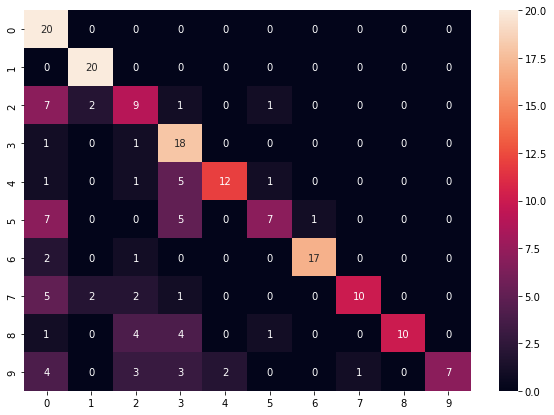

In [22]:
test_Labels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")

# without bias term
cfm = confusion_matrix(test_Labels, noBias)
classes = ["0", "1", "2","3", "4", "5","6", "7", "8", "9"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("ConfusionNoBias.jpg")

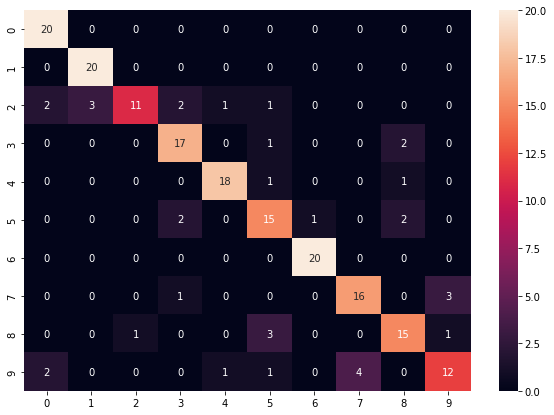

In [23]:
# with bias term
cfm = confusion_matrix(test_Labels, Bias)
classes = ["0", "1", "2","3", "4", "5","6", "7", "8", "9"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("ConfusionWithBias.jpg")

In [24]:
# without bias term
print('Accuracy of testing Phase without bias term =', accuracy_score(noBias,test_Labels)*100, '%')

# with bias term
print('Accuracy of testing Phase with bias term =', accuracy_score(Bias,test_Labels)*100, '%')

Accuracy of testing Phase without bias term = 65.0 %
Accuracy of testing Phase with bias term = 82.0 %


As shown using bias term resulted in a higher accuracy model than that without bias term